# File Query and Audio Segmentization #

### Pipeline processed most recently: Mar 07, 2024 ###

**_All data collected from TalkBank's AphasiaBank under permission. Data are not public._**

Input audio are remotely located in `'Aphasia_audio/'` and `'Control_audio/'`.

Output audio are remotely located in `'Aphasia_segment/'` and `'Control_segment/'`.

Output data are located in `'../../data/'`.

---

In [1]:
import os
import pandas as pd
import re
from datetime import datetime

current_date = datetime.now().strftime('%Y-%m-%d')
print(current_date)

2024-03-07


## 4. See distribution of `word_count` and decide on a query. ##

All process will be done on `clean_v2`, where phonological fragments are left in but fillers are removed.

## 4-1. Drop snippets with `UNK`. ##

In [10]:
# drop rows with 'UNK'
aphasia_all = pd.read_csv(f"../../data/Old data/aphasia_concat_fix_{current_date}.csv")
control_all = pd.read_csv(f"../../data/Old data/control_concat_fix_{current_date}.csv")

aphasia_all['clean_v2'] = aphasia_all['clean_v2'].fillna('')
control_all['clean_v2'] = control_all['clean_v2'].fillna('')

# standardize whitespace
aphasia_all['clean_v2'] = aphasia_all['clean_v2'].apply(lambda text: re.sub("\s+", " ", text.strip()))
control_all['clean_v2'] = control_all['clean_v2'].apply(lambda text: re.sub("\s+", " ", text.strip()))

aphasia_all = aphasia_all[~aphasia_all['clean_v2'].str.contains('UNK')]
control_all = control_all[~control_all['clean_v2'].str.contains('UNK')]

aphasia_all.to_csv(f"../../data/Old data/aphasia_nounk_{current_date}.csv", index=False)
control_all.to_csv(f"../../data/Old data/control_nounk_{current_date}.csv", index=False)

In [3]:
aphasia_all = pd.read_csv(f'../../data/Old data/aphasia_nounk_{current_date}.csv')
control_all = pd.read_csv(f'../../data/Old data/control_nounk_{current_date}.csv')

unique_aphasia_filenames = aphasia_all['filename'].nunique()
unique_control_filenames = control_all['filename'].nunique()

total_aphasia_snippets = aphasia_all.shape[0]
total_control_snippets = control_all.shape[0]

print(f"Total number of unique aphasia interviews: {unique_aphasia_filenames}")
print(f"Total number of unique control interviews: {unique_control_filenames}")

print(f"Total number of aphasia snippets: {total_aphasia_snippets}")
print(f"Total number of control snippets: {total_control_snippets}")

Total number of unique aphasia interviews: 548
Total number of unique control interviews: 347
Total number of aphasia snippets: 19115
Total number of control snippets: 5162


## 4-2. Drop snippets with `word_count` less than 4. ##

`kurland15a.cha`, `kurland15b.cha`, `kurland15c.cha`, `kurland15e.cha`, `MMA10a.cha` are left with no snippets after the two query. 

In [11]:
aphasia_all['clean_v2'] = aphasia_all['clean_v2'].fillna('')
control_all['clean_v2'] = control_all['clean_v2'].fillna('')

aphasia_all['word_count_v2'] = aphasia_all['clean_v2'].apply(lambda x: len(x.split()))
control_all['word_count_v2'] = control_all['clean_v2'].apply(lambda x: len(x.split()))

aphasia_filtered = aphasia_all[aphasia_all['word_count_v2'] > 3]
control_filtered = control_all[control_all['word_count_v2'] > 3]

aphasia_filtered.to_csv(f"../../data/Ground_Truth_Transcript/aphasia_nounk_over3_{current_date}.csv", index=False)
control_filtered.to_csv(f"../../data/Ground_Truth_Transcript/control_nounk_over3_{current_date}.csv", index=False)

In [5]:
aphasia_filtered = pd.read_csv(f'../../data/aphasia_nounk_over3_{current_date}.csv')
control_filtered = pd.read_csv(f'../../data/control_nounk_over3_{current_date}.csv')

unique_aphasia_filenames = aphasia_filtered['filename'].nunique()
unique_control_filenames = control_filtered['filename'].nunique()

total_aphasia_snippets = aphasia_filtered.shape[0]
total_control_snippets = control_filtered.shape[0]

print(f"Total number of unique aphasia interviews: {unique_aphasia_filenames}")
print(f"Total number of unique control interviews: {unique_control_filenames}")

print(f"Total number of aphasia snippets: {total_aphasia_snippets}")
print(f"Total number of control snippets: {total_control_snippets}")

Total number of unique aphasia interviews: 544
Total number of unique control interviews: 347
Total number of aphasia snippets: 9664
Total number of control snippets: 4302


## 4-3. Drop file with no audio. ##

`MMA20a.cha` is an interview file without any audio available. Drop this interview.

In [12]:
aphasia_filtered = pd.read_csv(f"../../data/Ground_Truth_Transcript/aphasia_nounk_over3_{current_date}.csv")

# filter out MMA20a.cha
aphasia_filtered = aphasia_filtered[aphasia_filtered['filename'] != 'MMA20a.cha']

aphasia_filtered.to_csv(f"../../data/Ground_Truth_Transcript/aphasia_nounk_over3_{current_date}.csv", index=False)

In [7]:
aphasia_filtered = pd.read_csv(f'../../data/aphasia_nounk_over3_{current_date}.csv')
control_filtered = pd.read_csv(f'../../data/control_nounk_over3_{current_date}.csv')

unique_aphasia_filenames = aphasia_filtered['filename'].nunique()
unique_control_filenames = control_filtered['filename'].nunique()

total_aphasia_snippets = aphasia_filtered.shape[0]
total_control_snippets = control_filtered.shape[0]

print(f"Total number of unique aphasia interviews: {unique_aphasia_filenames}")
print(f"Total number of unique control interviews: {unique_control_filenames}")

print(f"Total number of aphasia snippets: {total_aphasia_snippets}")
print(f"Total number of control snippets: {total_control_snippets}")

Total number of unique aphasia interviews: 543
Total number of unique control interviews: 347
Total number of aphasia snippets: 9648
Total number of control snippets: 4302


---

## 5. Check for `duration` duration. ##

In [8]:
aphasia_filtered = pd.read_csv(f'../../data/aphasia_nounk_over3_{current_date}.csv')
control_filtered = pd.read_csv(f'../../data/control_nounk_over3_{current_date}.csv')

aphasia_filtered['duration'] = aphasia_filtered['end_time'] - aphasia_filtered['start_time']
control_filtered['duration'] = control_filtered['end_time'] - control_filtered['start_time']

aphasia_filtered_short = aphasia_filtered[aphasia_filtered['duration'] < 2000]
control_filtered_short = control_filtered[control_filtered['duration'] < 2000]

# Counting the number of rows where duration < 2
count_aphasia_short = len(aphasia_filtered_short)
count_control_short = len(control_filtered_short)

# Displaying the results
print(f"Aphasia: {count_aphasia_short} rows with duration < 2")
print(f"Control: {count_control_short} rows with duration < 2")

# total_duration_aphasia = aphasia_filtered['duration'].sum()
# total_duration_control = control_filtered['duration'].sum()

# total_duration_aphasia_minutes = total_duration_aphasia / 60000
# total_duration_control_minutes = total_duration_control / 60000

# print(f"Total duration in aphasia dataset: {total_duration_aphasia_minutes:.2f} minutes")
# print(f"Total duration in control dataset: {total_duration_control_minutes:.2f} minutes")

# combined_total_minutes = total_duration_aphasia_minutes + total_duration_control_minutes
# print(f"Combined total duration: {combined_total_minutes:.2f} minutes")

# aphasia_filtered.to_csv(f'../../data/aphasia_nounk_over3_{current_date}.csv', index=False)
# control_filtered.to_csv(f'../../data/control_nounk_over3_{current_date}.csv', index=False)

Aphasia: 1345 rows with duration < 2
Control: 568 rows with duration < 2


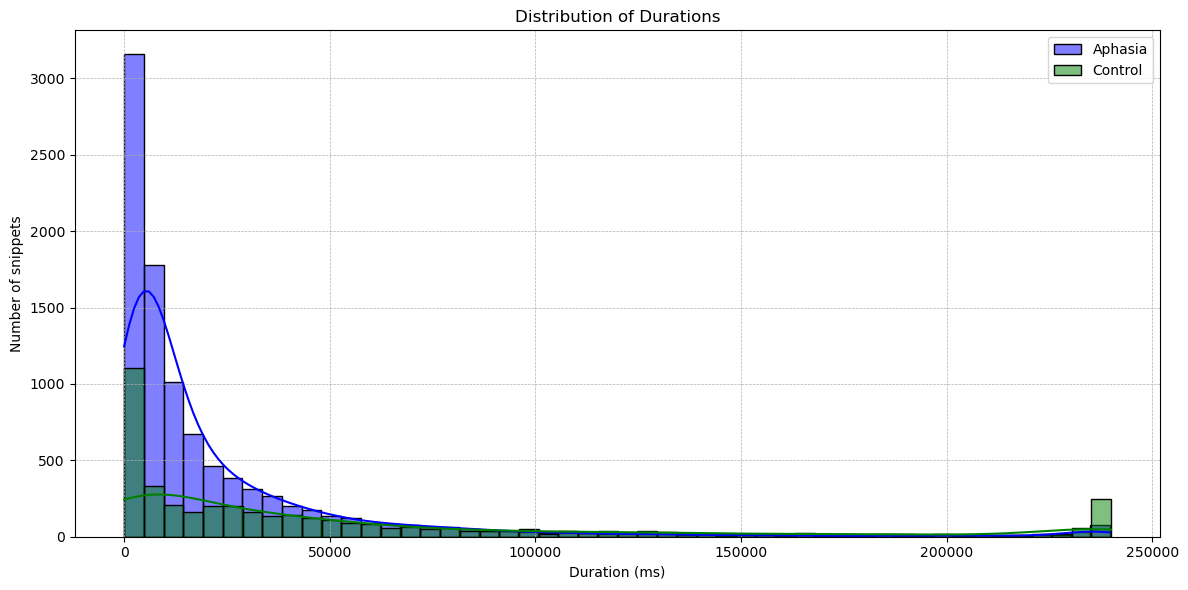

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.histplot(aphasia_filtered['duration'], color="blue", label="Aphasia", kde=True, bins=50, alpha=0.5)
sns.histplot(control_filtered['duration'], color="green", label="Control", kde=True, bins=50, alpha=0.5)

plt.xlabel('Duration (ms)')
plt.ylabel('Number of snippets')
plt.title('Distribution of Durations')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

## 6. Convert all files to `.wav` format. ###

This part is run on a remote server.

**linux command**

`for i in *.mp4; do ffmpeg -i "$i" -ac 1 -f wav "${i%.*}.wav"; done`

`for file in *.wav; do temp_file="${file%.wav}_temp.wav" ffmpeg -i "$file" -ar 44100 -acodec pcm_s16le "$temp_file" && mv "$temp_file" "$file"; done`


## 7. Segment original audio interviews into snippet files according to `aphasia/control_nounk_over3.csv`. ###

This part is run on a remote server.

In [ ]:
import os
import pandas as pd
from pydub import AudioSegment

def segment_audio_from_csv(directory_path, out_directory, csv_file):

    if not os.path.exists(out_directory):
        os.makedirs(out_directory)

    df = pd.read_csv(csv_file)

    print(f"Processing audio files from {directory_path}...")

    for index, row in df.iterrows():
        filename = row["filename"]
        file_id = filename.split('.')[0]
        start_time = row["start_time"]
        end_time = row["end_time"]
        segment_name = row["segment_name"]
        
        print(segment_name)
        audio_file_path = os.path.join(directory_path, file_id) + '.wav'
        audio = AudioSegment.from_file(audio_file_path)
        
        audio_segment = audio[start_time:end_time]

        new_file_path = os.path.join(out_directory, f"{segment_name}.wav")
        audio_segment.export(new_file_path, format="wav")

    print(f"Processing for {directory_path} complete!")

In [ ]:
segment_audio_from_csv('Aphasia_audio/', 'Aphasia_segment/', f'aphasia_nounk_over3_{current_date}.csv')
segment_audio_from_csv('Control_audio/', 'Control_semgnet/', f'control_nounk_over3_{current_date}.csv')